In [91]:
from mpl_toolkits.axes_grid1.inset_locator import mark_inset, inset_axes

import matplotlib.pyplot as plt
import pandas as pd

import config_syntheic as config

In [92]:
def load_csv_data(path: str) -> pd.core.frame.DataFrame:
    """Load CSV dataset as dataframe"""
    return pd.read_csv(path, delimiter=',')

In [93]:
def plot_syntheic_load(true_values: any, predicted_values: any, test_data_path: str) -> None:
    plt.figure(figsize=(10, 6))
    plt.plot(true_values, label='True Values')
    filename = test_data_path.split('/')[-1].split('.')[0]

    for i in range(config.nTrial):
        plt.plot(predicted_values.iloc[:, i], label=f'Prediction {i+1}')

    plt.xlabel('Time step t')
    plt.ylabel('sin(t)')
    plt.title(f'Syntheic Data Prediction ({filename})')
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()

In [94]:
def plot_syntheic_load_by_mean_max_min(true_values: any, predicted_values: any, sampling_interval: int) -> None:
    plt.figure(figsize=(10, 6))

    time_points = range(config.start, config.end+1)

    # sampling time points
    sampled_time_points = time_points[::sampling_interval]

    mean_values = predicted_values.mean(axis=1)
    sampled_mean_values = mean_values[sampled_time_points]

    max_values = predicted_values.max(axis=1)
    min_values = predicted_values.min(axis=1)

    sampled_max_values = max_values[sampled_time_points]
    sampled_min_values = min_values[sampled_time_points]

    plt.plot(sampled_time_points, sampled_mean_values, marker='^', linestyle='-', color='blue', label='Mean')
    plt.plot(sampled_time_points, sampled_max_values, marker='_', linestyle='', color='red', label='Max')
    plt.plot(sampled_time_points, sampled_min_values, marker='_', linestyle='', color='green', label='Min')
    plt.plot(true_values, color='black', label='True Values')

    for t in sampled_time_points:
        plt.plot([t, t], [sampled_min_values[t], sampled_max_values[t]], linestyle='-', color='gray')

    plt.xlabel('Time Step t')
    plt.ylabel('sin(t)')
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()


In [95]:
def plot_syntheic_load_by_mean_std(true_values: any, predicted_values: any, sampling_interval: int) -> None:
    plt.figure(figsize=(10, 6))

    time_points = range(config.start, config.end+1)
    sampled_time_points = time_points[::sampling_interval]

    mean_values = predicted_values.mean(axis=1)
    std_values = predicted_values.std(axis=1)

    sampled_mean_values = mean_values[sampled_time_points]
    sampled_std_values = std_values[sampled_time_points]

    plt.plot(sampled_time_points, sampled_mean_values, marker='^', markersize=6, linestyle='-', color='blue', label='Prediction')
    plt.errorbar(sampled_time_points, sampled_mean_values, yerr=sampled_std_values, fmt='_', color='red', elinewidth=1, capsize=3)
    plt.plot(time_points, true_values, color='black', label='True Values')

    plt.xlabel('Time Step t')
    plt.ylabel('sin(t)')
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()

In [96]:
def plot_syntheic_load_list_by_mean_std(true_values: any, predicted_values_list: any, sampling_interval: int) -> None:
    plt.figure(figsize=(10, 6))

    time_points = range(config.start, config.end+1)
    sampled_time_points = time_points[::sampling_interval]

    sampled_mean_values_list = []
    sampled_std_values_list = []

    for case_predicted_value in predicted_values_list:
        mean_values = case_predicted_value.mean(axis=1)
        std_values = case_predicted_value.std(axis=1)

        sampled_mean_values_list.append(mean_values[sampled_time_points])
        sampled_std_values_list.append(std_values[sampled_time_points])
    
    for index in range(len(sampled_mean_values_list)):
        plt.plot(sampled_time_points, sampled_mean_values_list[index], marker='^', markersize=6, linestyle='-', label=f'Case {index+1}')
        # plt.errorbar(sampled_time_points, sampled_mean_values_list[index], yerr=sampled_std_values_list[index], fmt='_', elinewidth=1, capsize=3)

    plt.plot(time_points, true_values, color='black', label='True Values')

    plt.xlabel('Time Step t')
    plt.ylabel('sin(t)')
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()

In [97]:
def plot_prediction_absolute_error(error_abs_value: any) -> None:
    plt.figure(figsize=(10, 6))

    x_values = [i for i in range(config.start, config.end+1)]

    for i in range(config.nTrial):
        plt.plot(x_values, error_abs_value.iloc[:, i], label=f'Prediction {i+1}')

    plt.xlabel('Time step t')
    plt.ylabel('sin(t)')
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()

In [98]:
def plot_prediction_absolute_error_by_mean_std(error_abs_value: any, sampling_interval: int) -> None:
    plt.figure(figsize=(10, 6))

    # TODO: fix this error epoch start and end
    x_values = range(config.start, config.end+1)
    sampled_x_values = x_values[::sampling_interval]

    time_points = range(config.error_abs_start, config.error_abs_end+1)
    sampled_time_points = time_points[::sampling_interval]

    mean_values = error_abs_value.mean(axis=1)
    std_values = error_abs_value.std(axis=1)

    sampled_mean_values = mean_values[sampled_time_points]
    sampled_std_values = std_values[sampled_time_points]

    # TODO: fix this error epoch start and end
    plt.plot(sampled_x_values, sampled_mean_values, marker='^', markersize=6, linestyle='-', color='blue', label='Error')
    # TODO: fix this error epoch start and end
    plt.errorbar(sampled_x_values, sampled_mean_values, yerr=sampled_std_values, fmt='_', color='red', elinewidth=1, capsize=3)

    plt.xlabel('Time Step t')
    plt.ylabel('sin(t)')
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()
    

In [99]:
def plot_prediction_absolute_error_list_by_mean_std(error_abs_value_list: any, sampling_interval: int, zoom_coords: tuple) -> None:
    fig, ax = plt.subplots(figsize=(10, 6))

    x_values = range(config.start, config.end+1)
    sampled_x_values = x_values[::sampling_interval]

    time_points = range(config.error_abs_start, config.error_abs_end+1)
    sampled_time_points = time_points[::sampling_interval]

    sampled_mean_values_list = []
    sampled_std_values_list = []

    for case_error_abs_value in error_abs_value_list:
        mean_values = case_error_abs_value.mean(axis=1)
        std_values = case_error_abs_value.std(axis=1)

        sampled_mean_values_list.append(mean_values[sampled_time_points])
        sampled_std_values_list.append(std_values[sampled_time_points])

    for index in range(len(sampled_mean_values_list)):
        color = config.color_dict.get(index % len(config.color_dict))
        ax.plot(sampled_x_values, sampled_mean_values_list[index], marker='^', markersize=6, linestyle='-', label=f'Case {index+1}')
        ax.errorbar(sampled_x_values, sampled_mean_values_list[index], yerr=sampled_std_values_list[index], fmt='_', elinewidth=1, capsize=3, color=color)

    ax.set_xlabel('Time Step t')
    ax.set_ylabel('Prediction error')
    ax.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    
    zoom_coords_x = zoom_coords[0]
    zoom_coords_y = zoom_coords[1]

    # The `inset_axes`` function is used to create an inset axes, allowing you to create a zoomed-in plot within a larger plot.
    # It can be used to specify the position and size of the inset axes.
    # The `bbox_to_anchor`` parameter is used to specify the relative position of the inset axes within the parent axes.
    ax_zoom = inset_axes(ax, width="100%", height="100%", bbox_to_anchor=(1.08, 0.2, 0.5, 0.5), bbox_transform=ax.transAxes)
    
    for index in range(len(sampled_mean_values_list)):
        color = config.color_dict.get(index % len(config.color_dict))
        ax_zoom.plot(sampled_x_values, sampled_mean_values_list[index], marker='^', markersize=6, linestyle='-', label=f'Case 1')
        ax_zoom.errorbar(sampled_x_values, sampled_mean_values_list[index], yerr=sampled_std_values_list[index], fmt='_', elinewidth=1, capsize=3, color=color)
    
    ax_zoom.axhline(y=min(sampled_mean_values_list[0]), color='gray', linestyle='--')
    ax_zoom.set_xlim(*zoom_coords_x) 
    ax_zoom.set_ylim(*zoom_coords_y)
    mark_inset(ax, ax_zoom, loc1=2, loc2=4, fc="none", ec="0.5")
    
    plt.show()

## Case1

In [100]:
df = load_csv_data(config.predict_results_path)
df.head()

,Unnamed: 0,TRUE,Unnamed: 2,1,2,3,4,5,6,7,8,9,10,Unnamed: 13
0,1,0.500000,NaN,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500,NaN
1,2,0.531445,NaN,0.530,0.530,0.530,0.530,0.530,0.530,0.530,0.530,0.530,0.530,NaN
2,3,0.562767,NaN,0.565,0.565,0.565,0.565,0.565,0.565,0.565,0.565,0.565,0.565,NaN
3,4,0.593841,NaN,0.595,0.595,0.595,0.595,0.595,0.595,0.595,0.595,0.595,0.595,NaN
4,5,0.624545,NaN,0.625,0.625,0.625,0.625,0.625,0.625,0.625,0.625,0.625,0.625,NaN


In [101]:
df.tail()

,Unnamed: 0,TRUE,Unnamed: 2,1,2,3,4,5,6,7,8,9,10,Unnamed: 13
39996,19996,NaN,NaN,5.460000e-03,0.00046,0.00546,0.00046,0.00046,4.600000e-04,0.00546,0.00204,0.00046,0.00546,NaN
39997,19997,NaN,NaN,1.160000e-03,0.00116,0.00616,0.00116,0.00116,1.340000e-03,0.00384,0.00884,0.00134,0.01116,NaN
39998,19998,NaN,NaN,2.230000e-03,0.00027,0.00277,0.00223,0.00277,2.770000e-03,0.00277,0.00277,0.00277,0.01473,NaN
39999,19999,NaN,NaN,3.550000e-03,0.00355,0.00145,0.00355,0.00145,3.550000e-03,0.00145,0.00105,0.00355,0.00355,NaN
40000,20000,NaN,NaN,2.220450e-16,0.00250,0.00500,0.00500,0.00500,2.220450e-16,0.00500,0.00500,0.00500,0.00500,NaN


In [102]:
# true values need to be shifted by 1
true_values = df["TRUE"][config.start+1:config.end+1+1]
true_values

1        0.531445
2        0.562767
3        0.593841
4        0.624545
5        0.654758
           ...   
19997    1.406160
19998    1.437230
19999    1.468550
20000    1.500000
20001         NaN
Name: TRUE, Length: 20001, dtype: float64

In [103]:
predicted_column = list(map(lambda x: str(x), range(1, config.nTrial+1)))
predicted_values = df[predicted_column][config.start:config.end+1]
predicted_values

,1
0,0.500
1,0.530
2,0.565
3,0.595
4,0.625
...,...
19996,1.405
19997,1.435
19998,1.465
19999,1.500


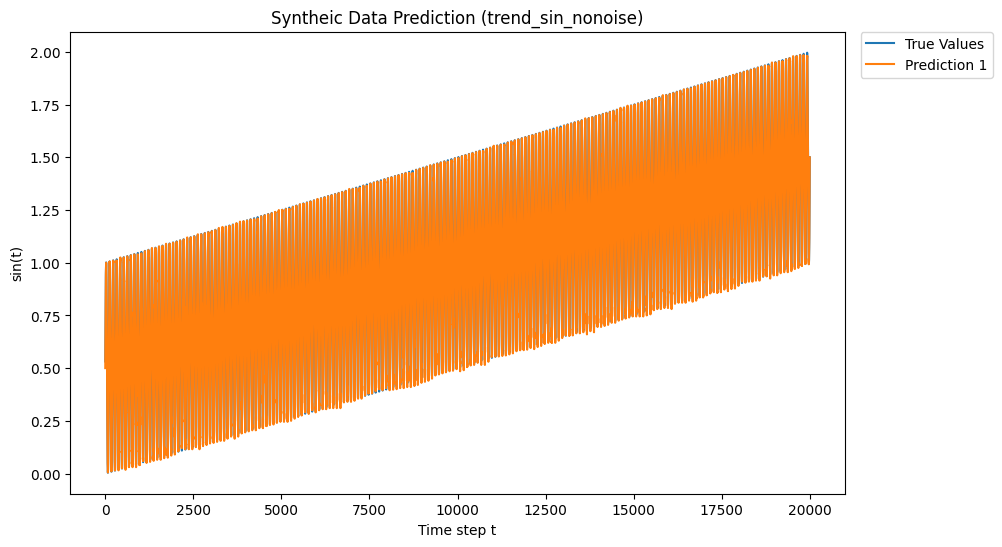

In [104]:
plot_syntheic_load(true_values, predicted_values, config.test_data_path)

In [105]:
# plot_syntheic_load_by_mean_std(true_values, predicted_values, sampling_interval=config.sampling_interval)

In [106]:
# abs(outputdata[n][a] - inputdata[a+1])
error_abs_value = df[predicted_column][config.error_abs_start:config.error_abs_end+1]
error_abs_value

,1
20000,NaN
20001,3.144500e-02
20002,3.276700e-02
20003,2.884100e-02
20004,2.954500e-02
...,...
39996,5.460000e-03
39997,1.160000e-03
39998,2.230000e-03
39999,3.550000e-03


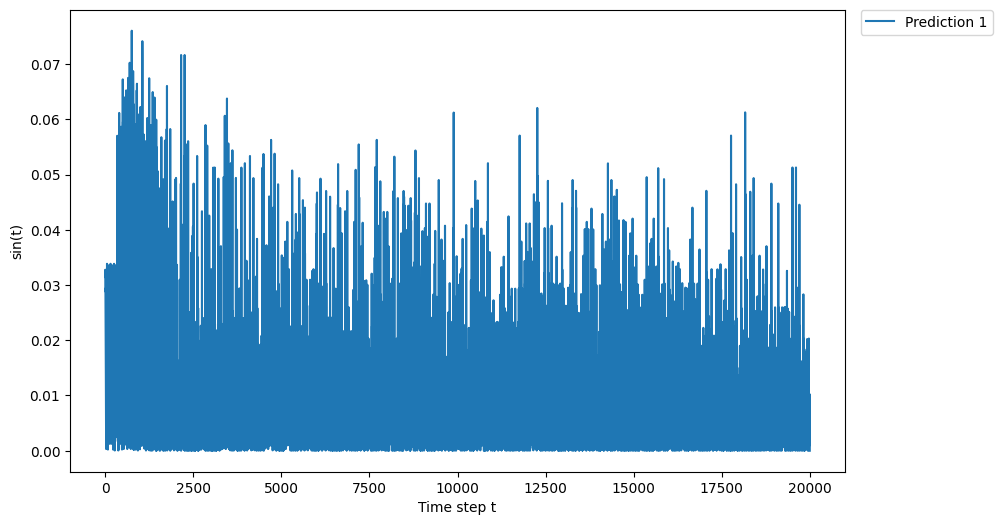

In [107]:
plot_prediction_absolute_error(error_abs_value)

In [108]:
# plot_prediction_absolute_error_by_mean_std(error_abs_value, sampling_interval=config.sampling_interval)

## proposed

In [109]:
df_proposed = load_csv_data(config.proposed_predict_results_path)
df_proposed.head()

,Unnamed: 0,TRUE,Unnamed: 2,1,Unnamed: 4
0,1,0.500000,NaN,0.5000,NaN
1,2,0.531445,NaN,0.5325,NaN
2,3,0.562767,NaN,0.5625,NaN
3,4,0.593841,NaN,0.5950,NaN
4,5,0.624545,NaN,0.6250,NaN


In [110]:
# true values need to be shifted by 1
true_values_proposed = df_proposed["TRUE"][config.start+1:config.end+1+1]
true_values_proposed

1        0.531445
2        0.562767
3        0.593841
4        0.624545
5        0.654758
           ...   
19997    1.406160
19998    1.437230
19999    1.468550
20000    1.500000
20001         NaN
Name: TRUE, Length: 20001, dtype: float64

In [111]:
predicted_column = list(map(lambda x: str(x), range(1, config.nTrial+1)))
predicted_values_proposed = df_proposed[predicted_column][config.start:config.end+1]
predicted_values_proposed

,1
0,0.5000
1,0.5325
2,0.5625
3,0.5950
4,0.6250
...,...
19996,1.4050
19997,1.4375
19998,1.4675
19999,1.5000


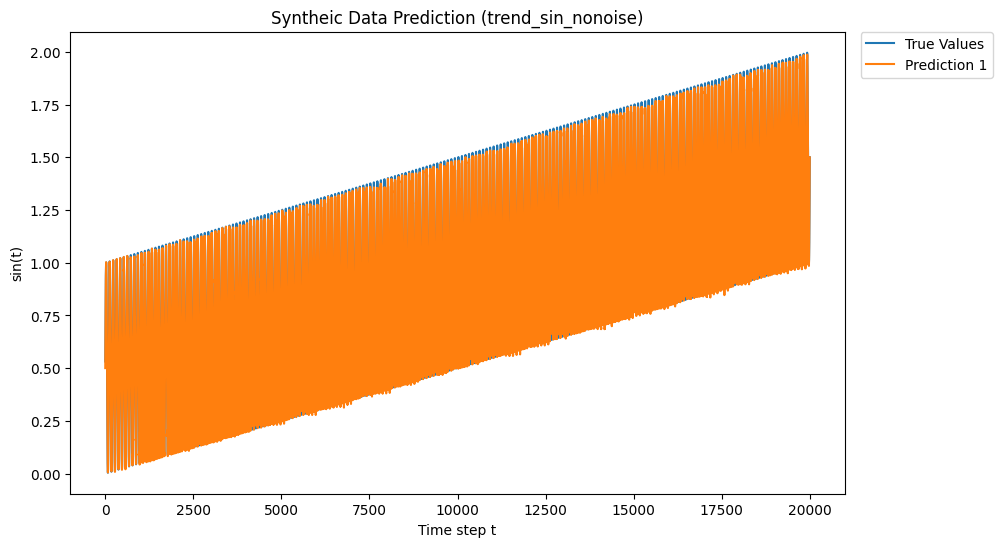

In [112]:
plot_syntheic_load(true_values_proposed, predicted_values_proposed, config.test_data_path)

In [113]:
# plot_syntheic_load_by_mean_std(true_values_proposed, predicted_values_proposed, sampling_interval=config.sampling_interval)

In [114]:
# abs(outputdata[n][a] - inputdata[a+1])
error_abs_value_proposed = df_proposed[predicted_column][config.error_abs_start:config.error_abs_end+1]
error_abs_value_proposed

,1
20000,NaN
20001,3.144500e-02
20002,3.026700e-02
20003,3.134100e-02
20004,2.954500e-02
...,...
39996,4.600000e-04
39997,1.160000e-03
39998,2.700000e-04
39999,1.050000e-03


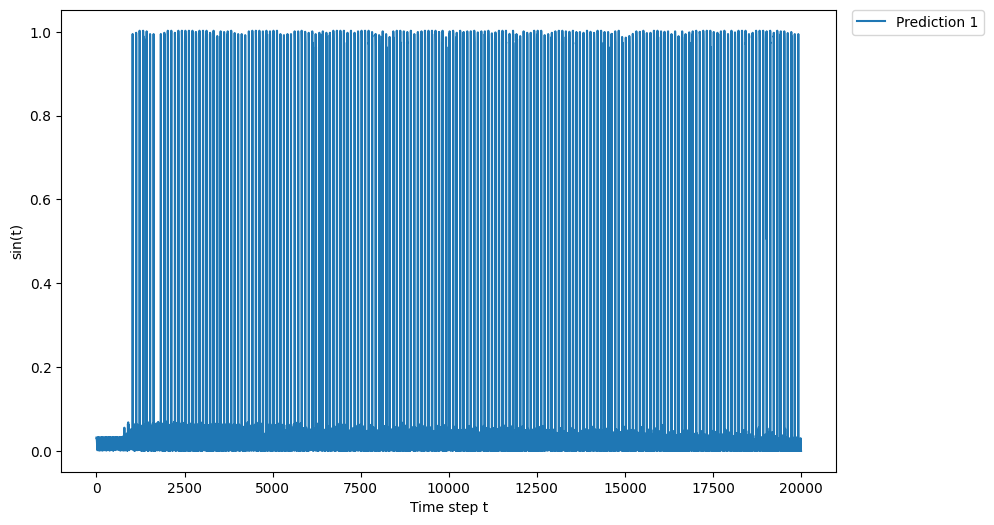

In [115]:
plot_prediction_absolute_error(error_abs_value_proposed)

In [116]:
# plot_prediction_absolute_error_by_mean_std(error_abs_value_proposed, sampling_interval=config.sampling_interval)

# Summary

In [117]:
predicted_values_list = []
error_abs_value_list = []

predicted_values_list.append(predicted_values)
predicted_values_list.append(predicted_values_proposed)

error_abs_value_list.append(error_abs_value)
error_abs_value_list.append(error_abs_value_proposed)

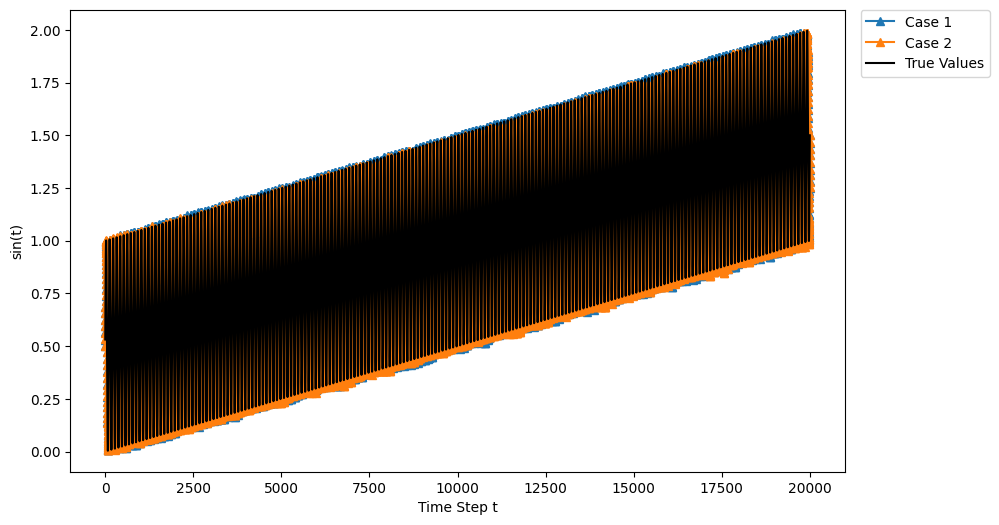

In [118]:
plot_syntheic_load_list_by_mean_std(true_values, predicted_values_list, sampling_interval=config.sampling_interval)

StopIteration: 

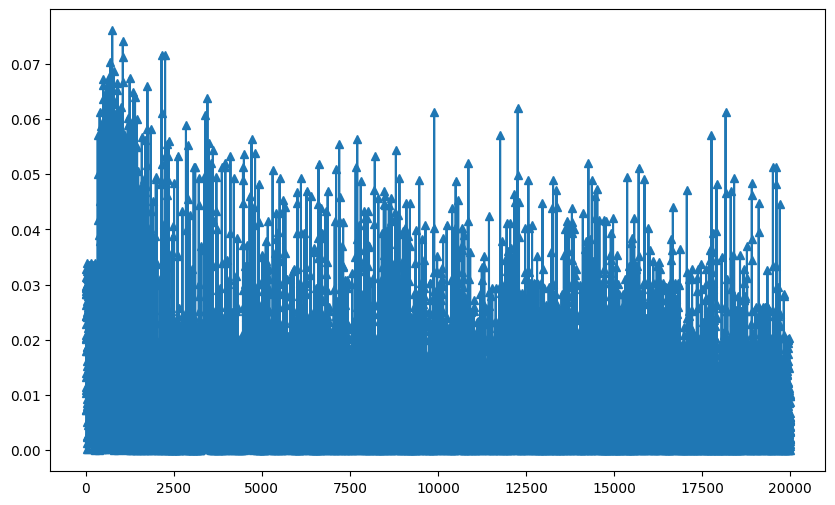

In [119]:
# zoom_coords = ((zoom_xmin, zoom_xmax), (zoom_ymin, zoom_ymax))
# plot_prediction_absolute_error_list_by_mean_std(error_abs_value_list, sampling_interval=config.sampling_interval, zoom_coords=config.zoom_coords)